In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run imports.py

In [3]:
from goexplore import *

In [4]:
import glob

In [5]:
with open('atari_games_57.txt') as f:
    env_ids = [line.strip() for line in f.readlines()]

In [70]:
env_id2archives = {}

for env_id in tqdm(env_ids):
    env_id2archives[env_id] = [np.load(f, allow_pickle=True).item() for f in glob.glob(f'./data/gesweep/{env_id}*')]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

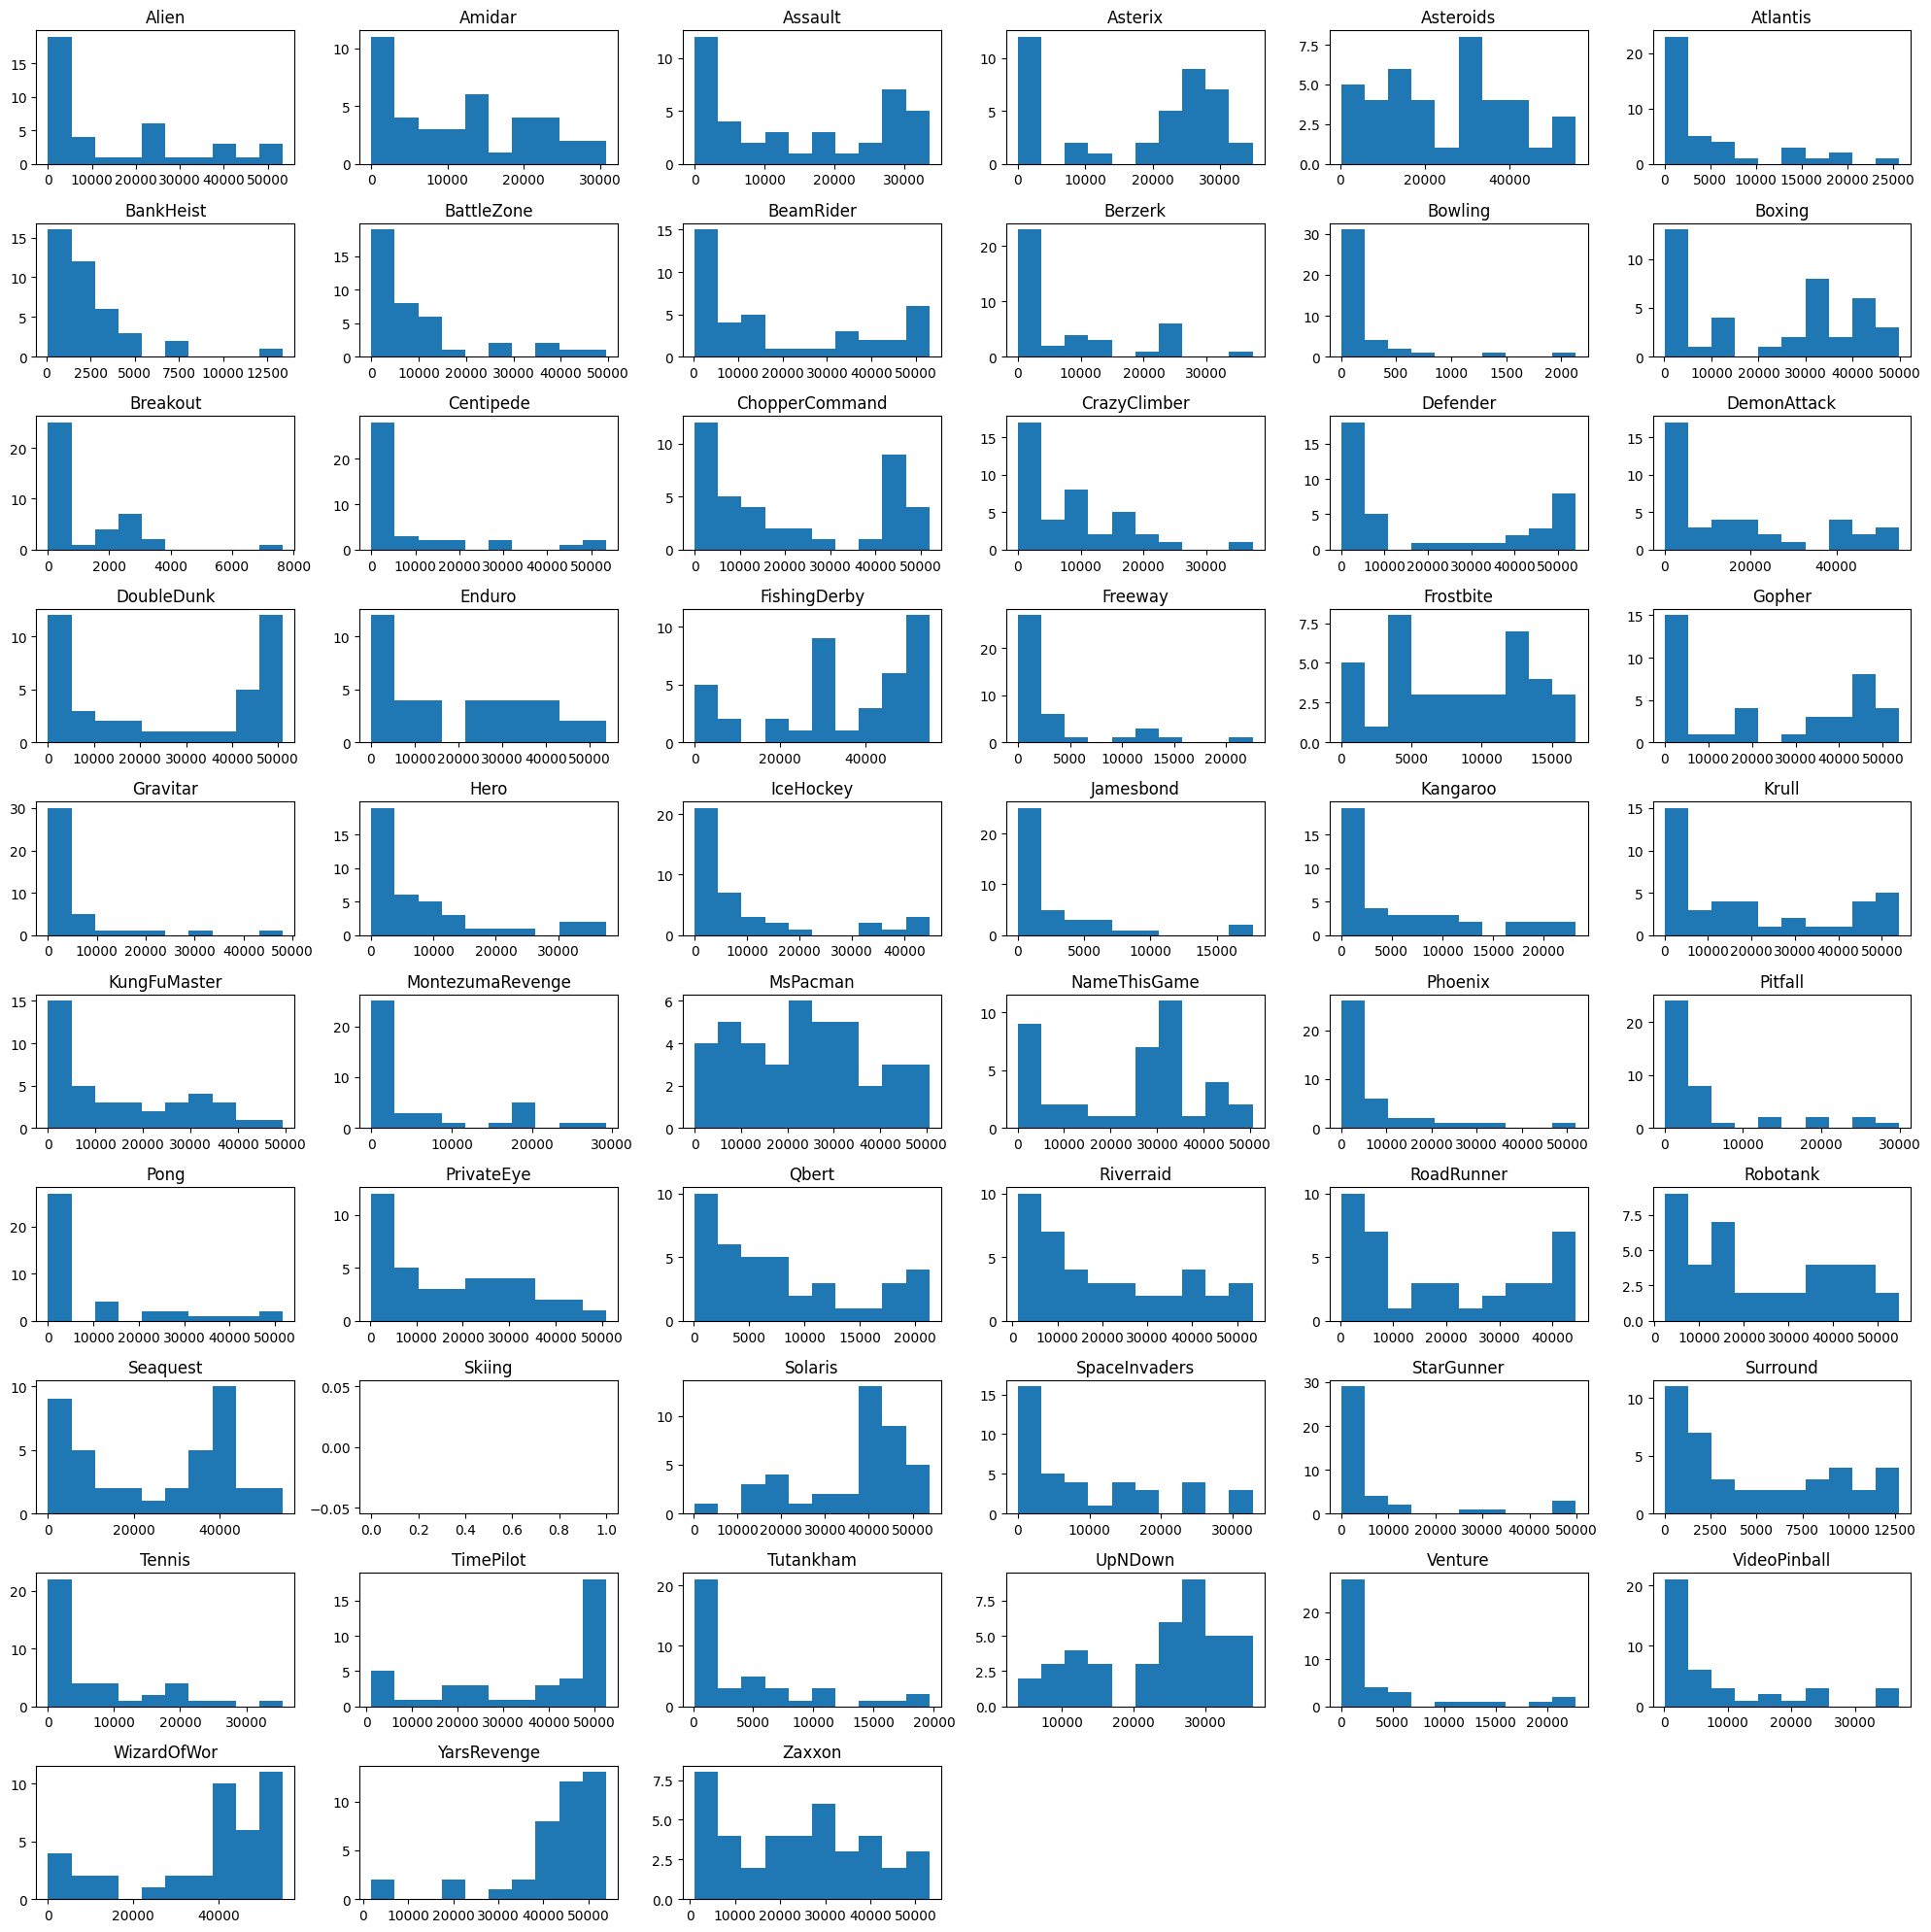

In [71]:
plt.figure(figsize=(20, 20))
for i, env_id in enumerate(tqdm(env_ids)):
    a = env_id2archives[env_id]
    plt.subplot(10, 6, i+1)
    plt.hist([len(i['trajs']) for i in a])
    plt.title(env_id)
plt.tight_layout()
plt.show()

In [72]:
for env_id in env_ids:
    print(env_id)
    a = env_id2archives[env_id]
    sizes = np.array([len(i['trajs']) for i in a])
    hs = [i['config']['h'] for i in a]
    ws = [i['config']['w'] for i in a]
    ds = [i['config']['d'] for i in a]
    configs = np.array([hs, ws, ds]).T
    idx = np.argsort(np.abs(sizes-15000))[:5]
    print(sizes[idx])
    print(configs[idx].T)
    print()

Alien
[16742 10928  9404  9387 21487]
[[ 7 10  5  4  6]
 [10  6 10 16 15]
 [ 8  4  8 15 18]]

Amidar
[14977 15039 15202 13963 13599]
[[10 16 16 16 18]
 [19  5 11  7 18]
 [13 19 18 14  5]]

Assault
[13750 12815 17897 18655 18780]
[[ 9 10  7  9  6]
 [17 18 11 15 14]
 [ 9  7 13 10 14]]

Asterix
[10810 10127 20373 20408 21914]
[[ 5  4 14  8 13]
 [12 10  5  8  5]
 [11 12 16 15 18]]

Asteroids
[14468 14242 16005 16470 16782]
[[ 7 14  7  4  8]
 [13  6 13 18 11]
 [ 9 10  9 12 10]]

Atlantis
[14774 14603 13936 16265 18231]
[[13 17 14 12 19]
 [18 16 14 17 14]
 [19 13 17 12 17]]

BankHeist
[13373  7724  7321  4785  4675]
[[19 18 17 19 13]
 [19 16 17 16 15]
 [19 13 11  9 16]]

BattleZone
[15402 14184 13826 13288 12747]
[[15 11 17 14 19]
 [16 14 13  9  8]
 [ 8 14  8 13 14]]

BeamRider
[15291 15347 15511 13272 13035]
[[16 13  9 12 17]
 [16  9  7  9  5]
 [ 7 11 14 12 17]]

Berzerk
[14700 12620 11869 11102  9815]
[[10 19  7  7 11]
 [16 14 14 11  7]
 [12  6 15 16 13]]

Bowling
[2134 1290  787  533  497

  0%|          | 0/57 [00:00<?, ?it/s]

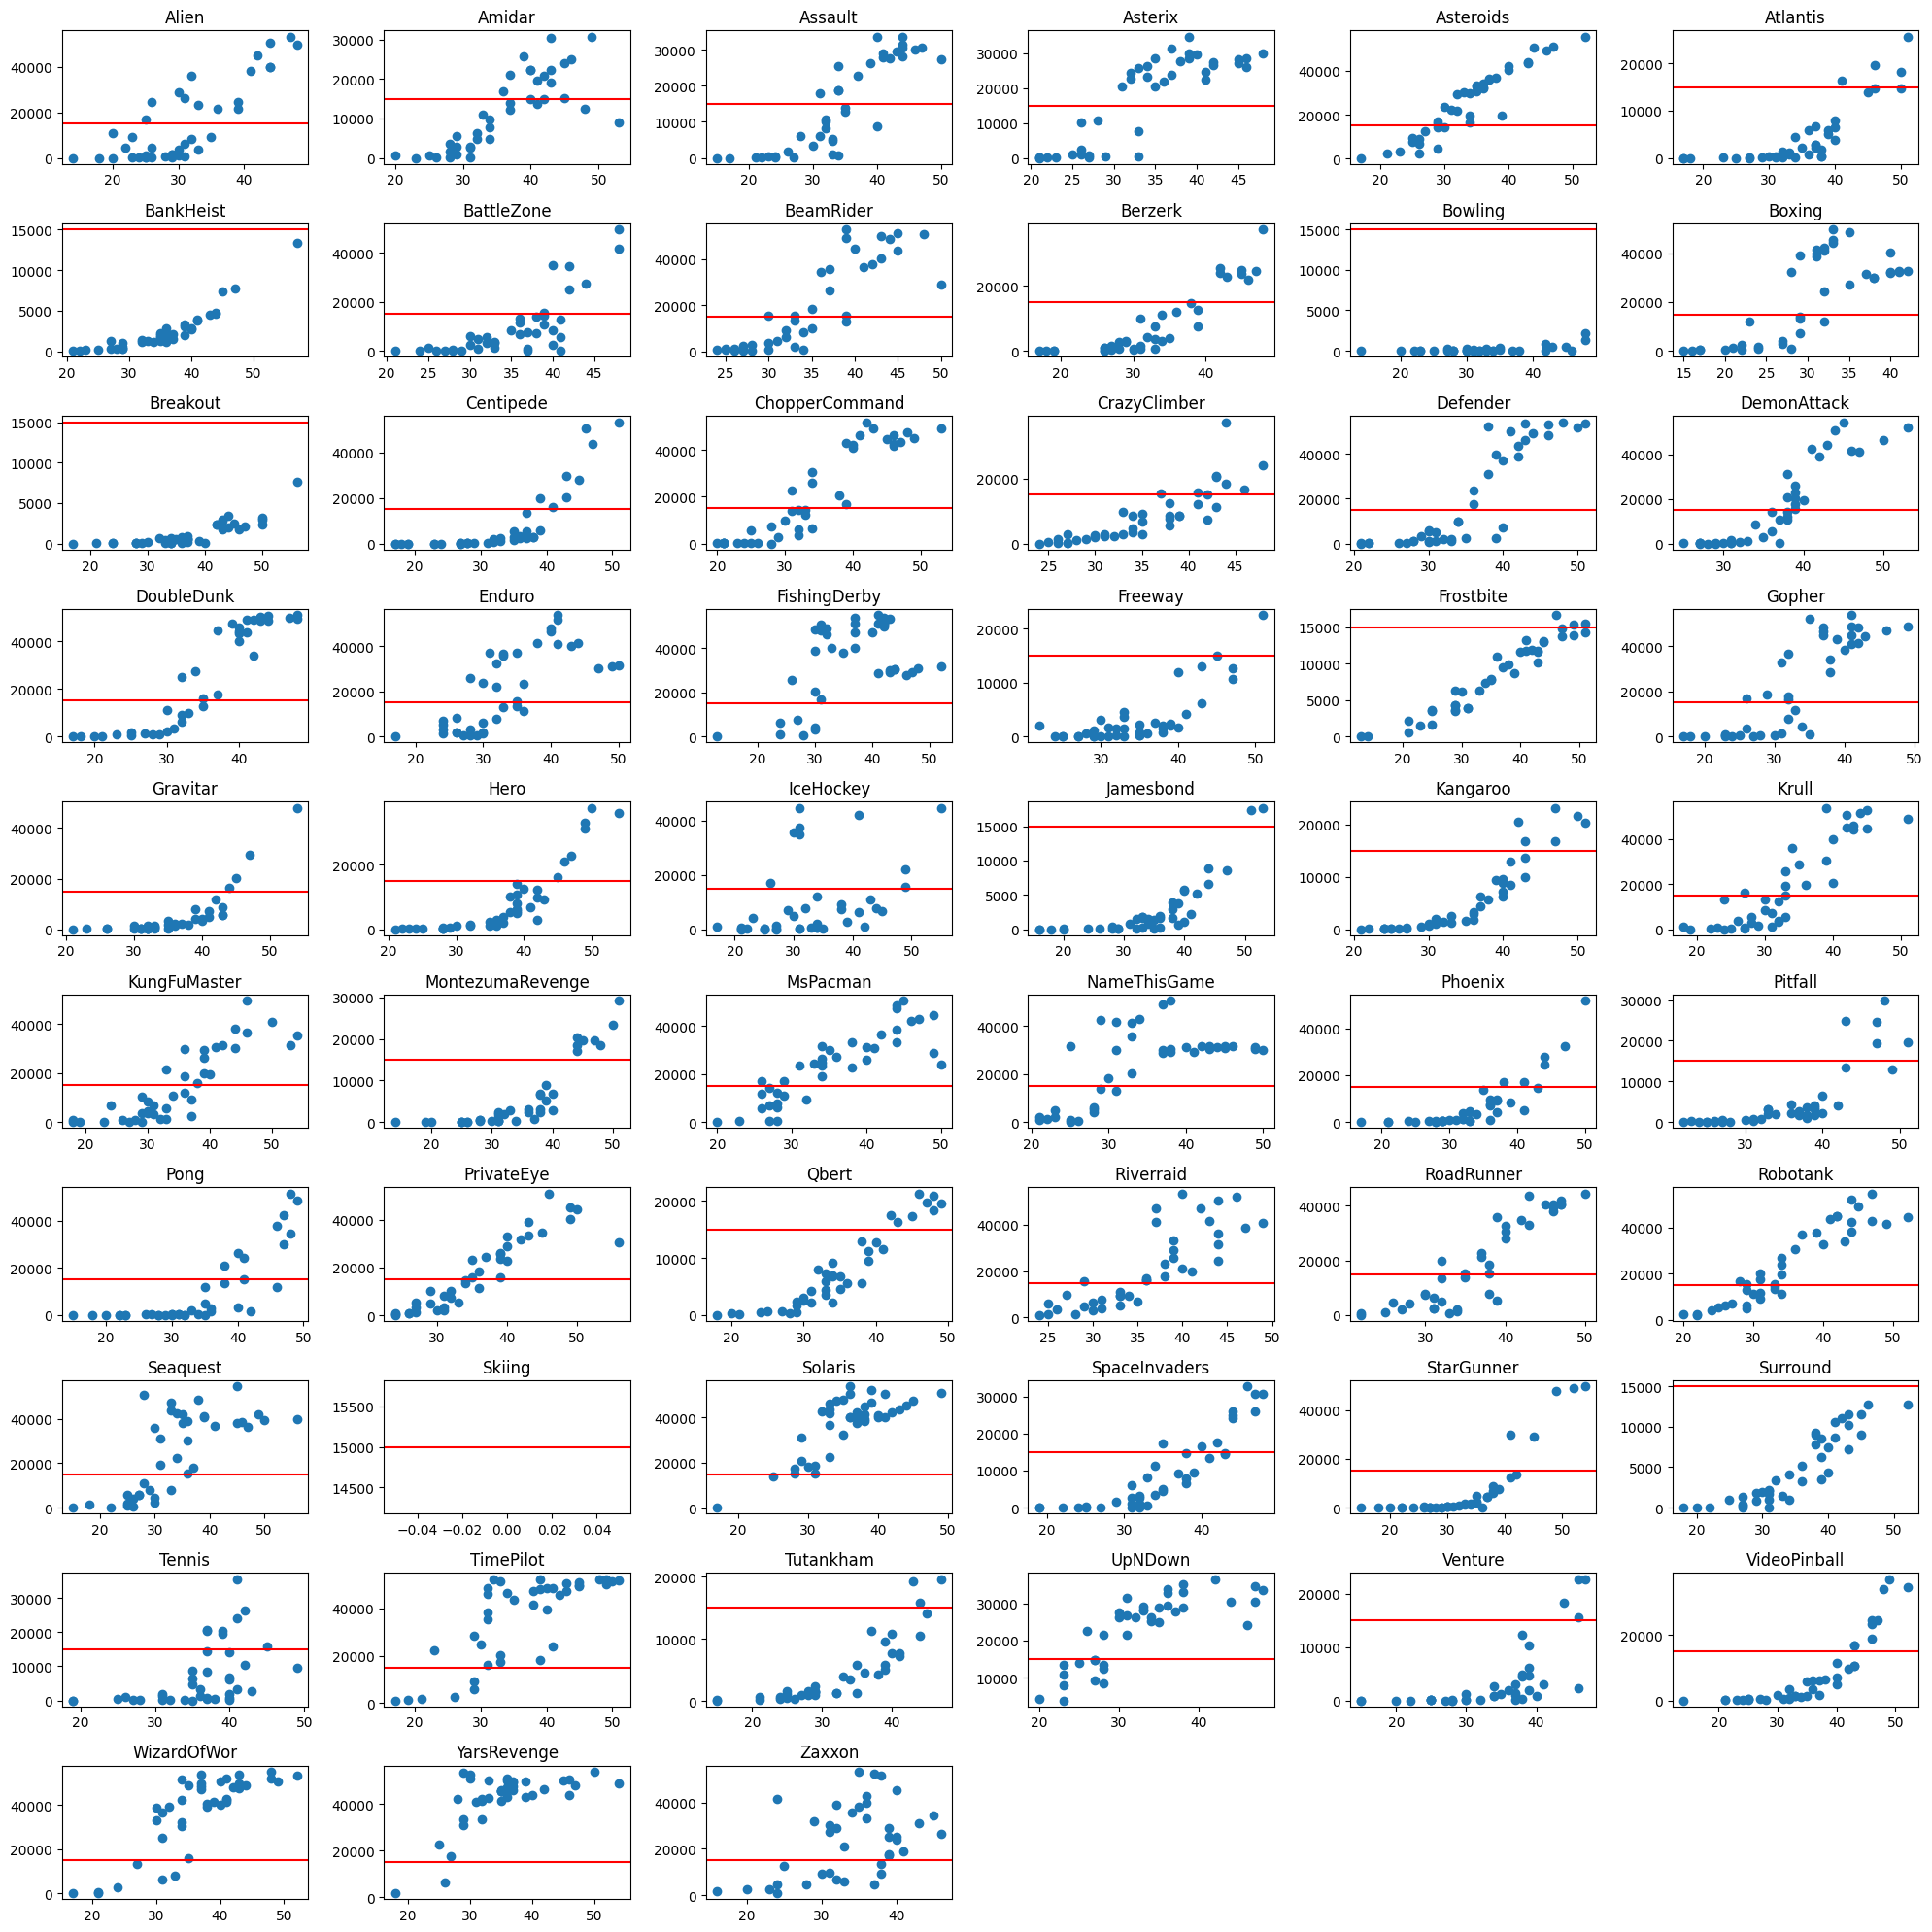

In [75]:
plt.figure(figsize=(20, 20))
for i, env_id in enumerate(tqdm(env_ids)):
    a = env_id2archives[env_id]
    sizes = np.array([len(i['trajs']) for i in a])
    hs = [i['config']['h'] for i in a]
    ws = [i['config']['w'] for i in a]
    ds = [i['config']['d'] for i in a]
    configs = np.array([hs, ws, ds]).T
    idx = np.argsort(np.abs(sizes-15000))[:5]
    
    plt.subplot(10, 6, i+1)
    plt.scatter(configs.sum(axis=-1), sizes)
    plt.axhline(y=15000, c='red')
    plt.title(env_id)
plt.tight_layout()
plt.show()

  0%|          | 0/57 [00:00<?, ?it/s]

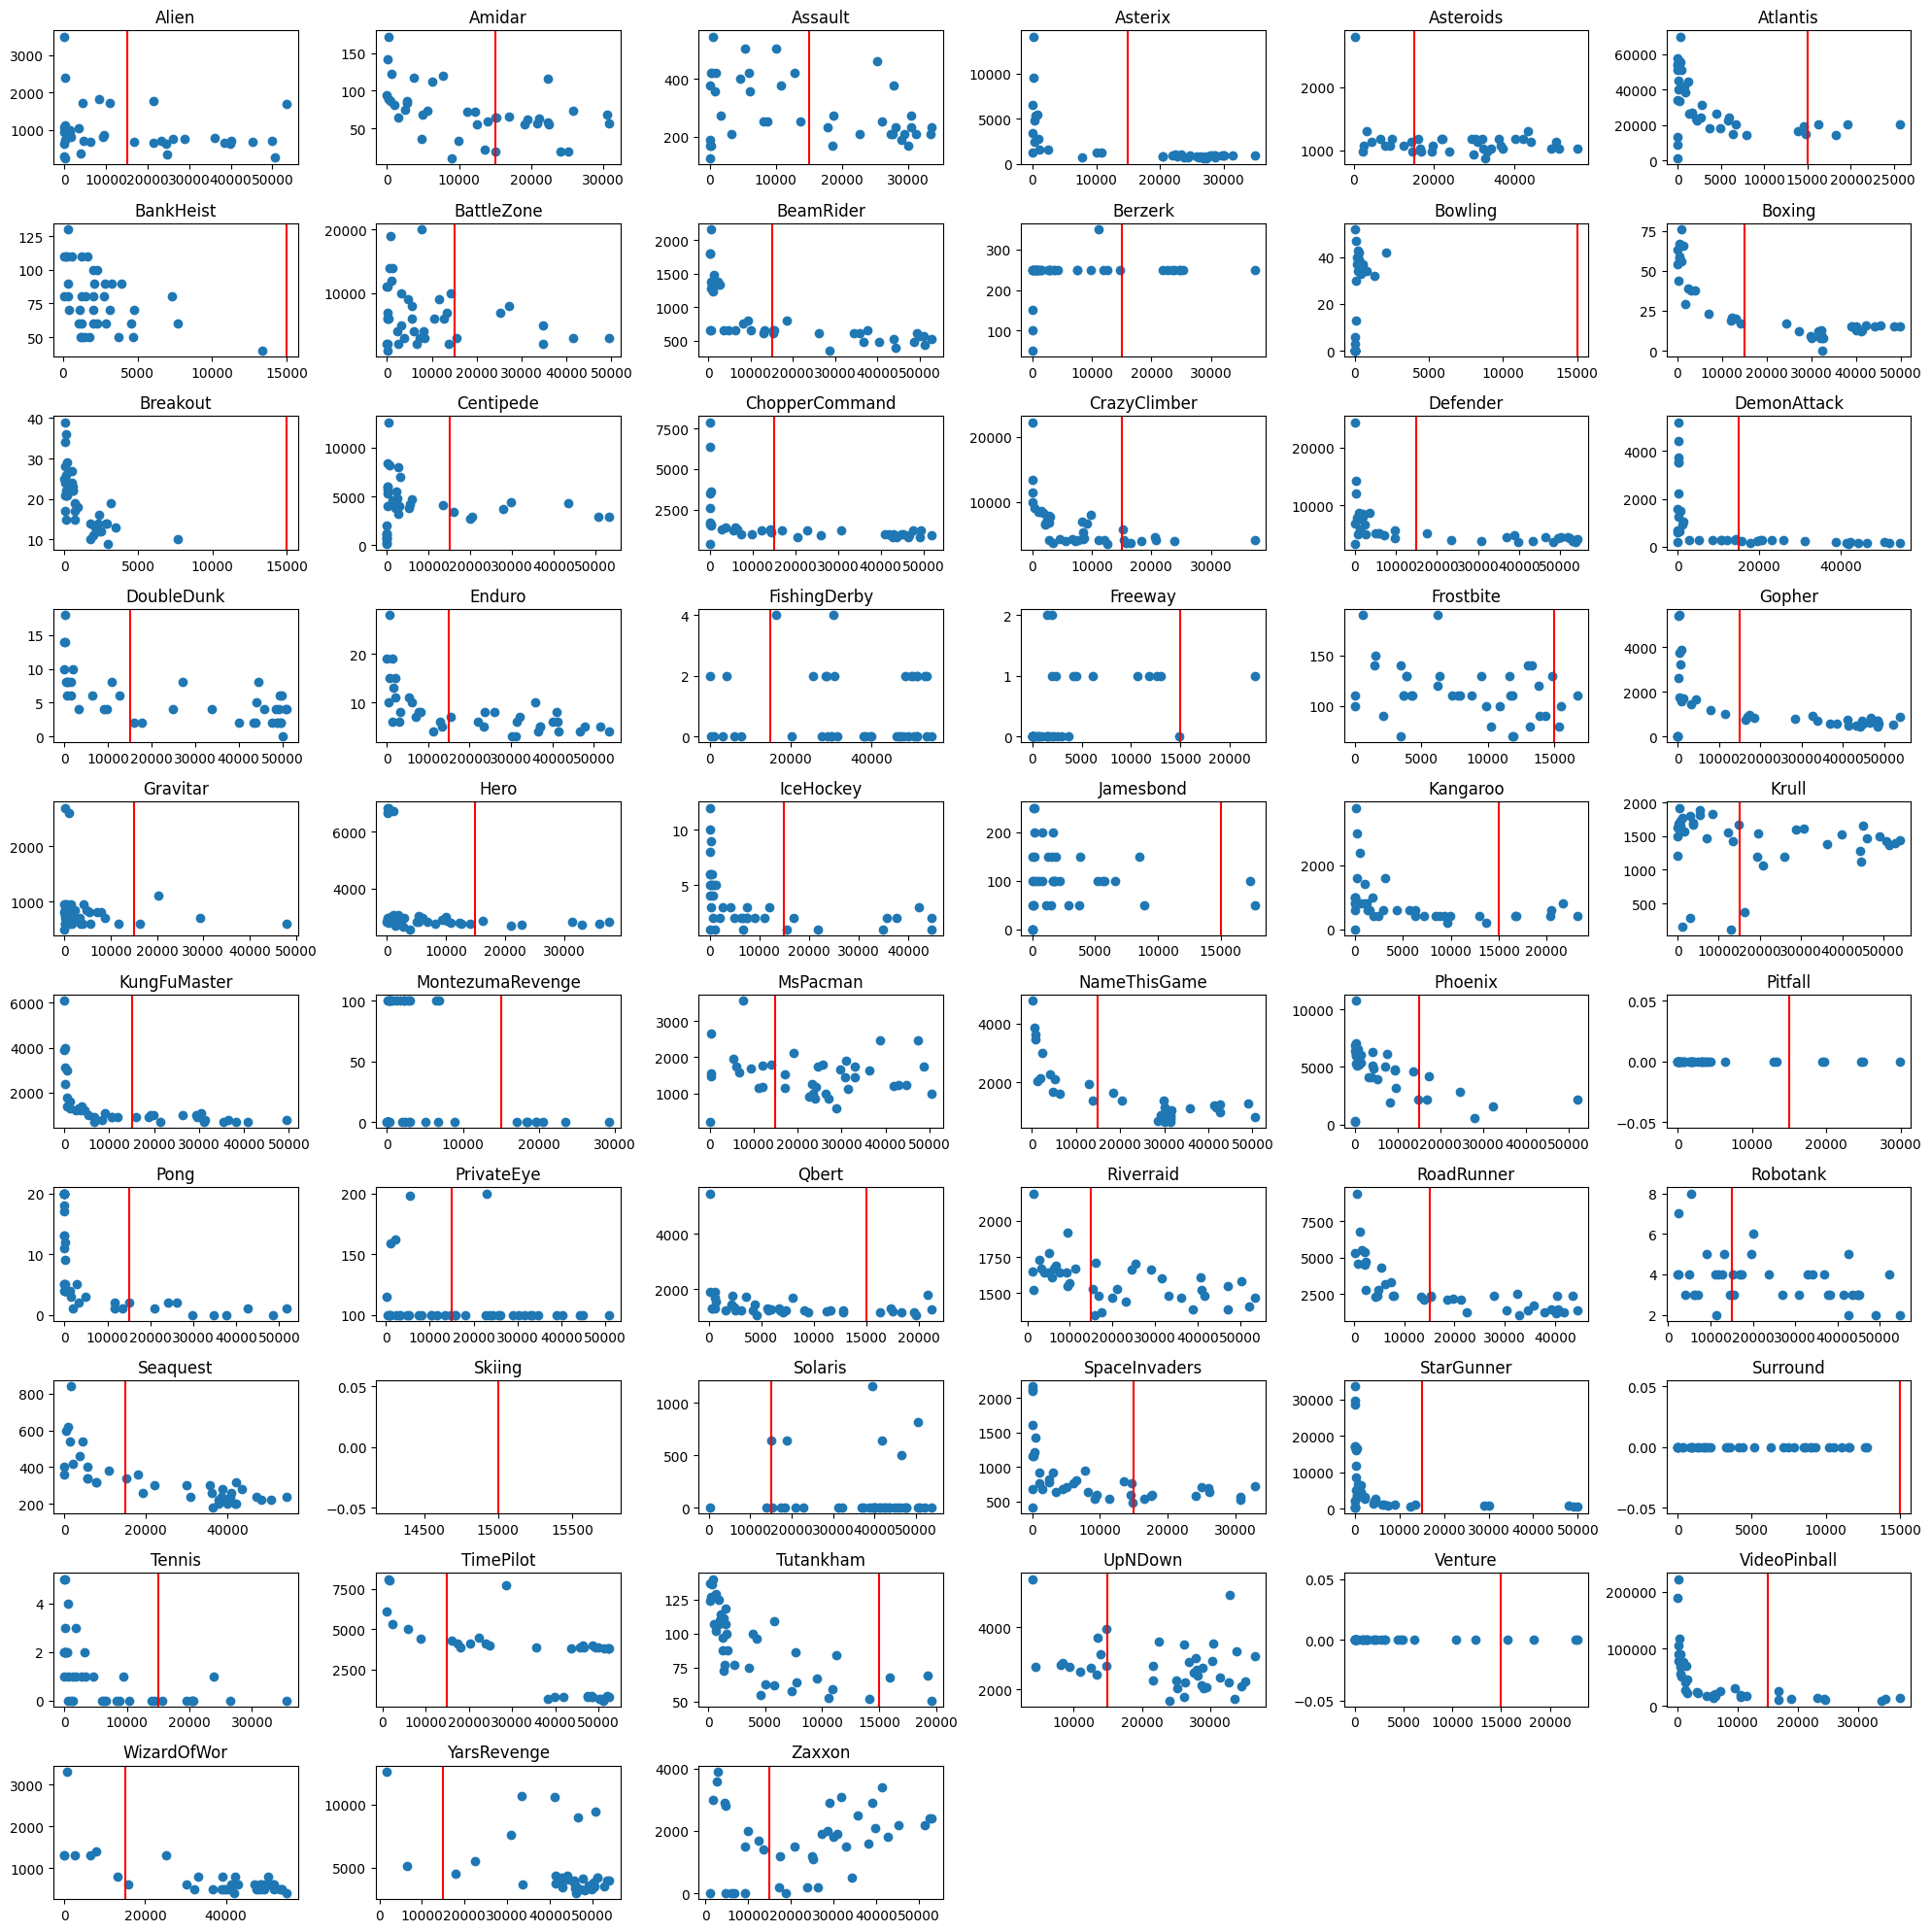

In [76]:
plt.figure(figsize=(20, 20))
for i, env_id in enumerate(tqdm(env_ids)):
    a = env_id2archives[env_id]
    sizes = np.array([len(i['trajs']) for i in a])
    scores = np.array([max(i['rets']) for i in a])
    
    plt.subplot(10, 6, i+1)
    plt.scatter(sizes, scores)
    plt.axvline(x=15000, c='red')

    plt.title(env_id)
plt.tight_layout()
plt.show()

  0%|          | 0/57 [00:00<?, ?it/s]

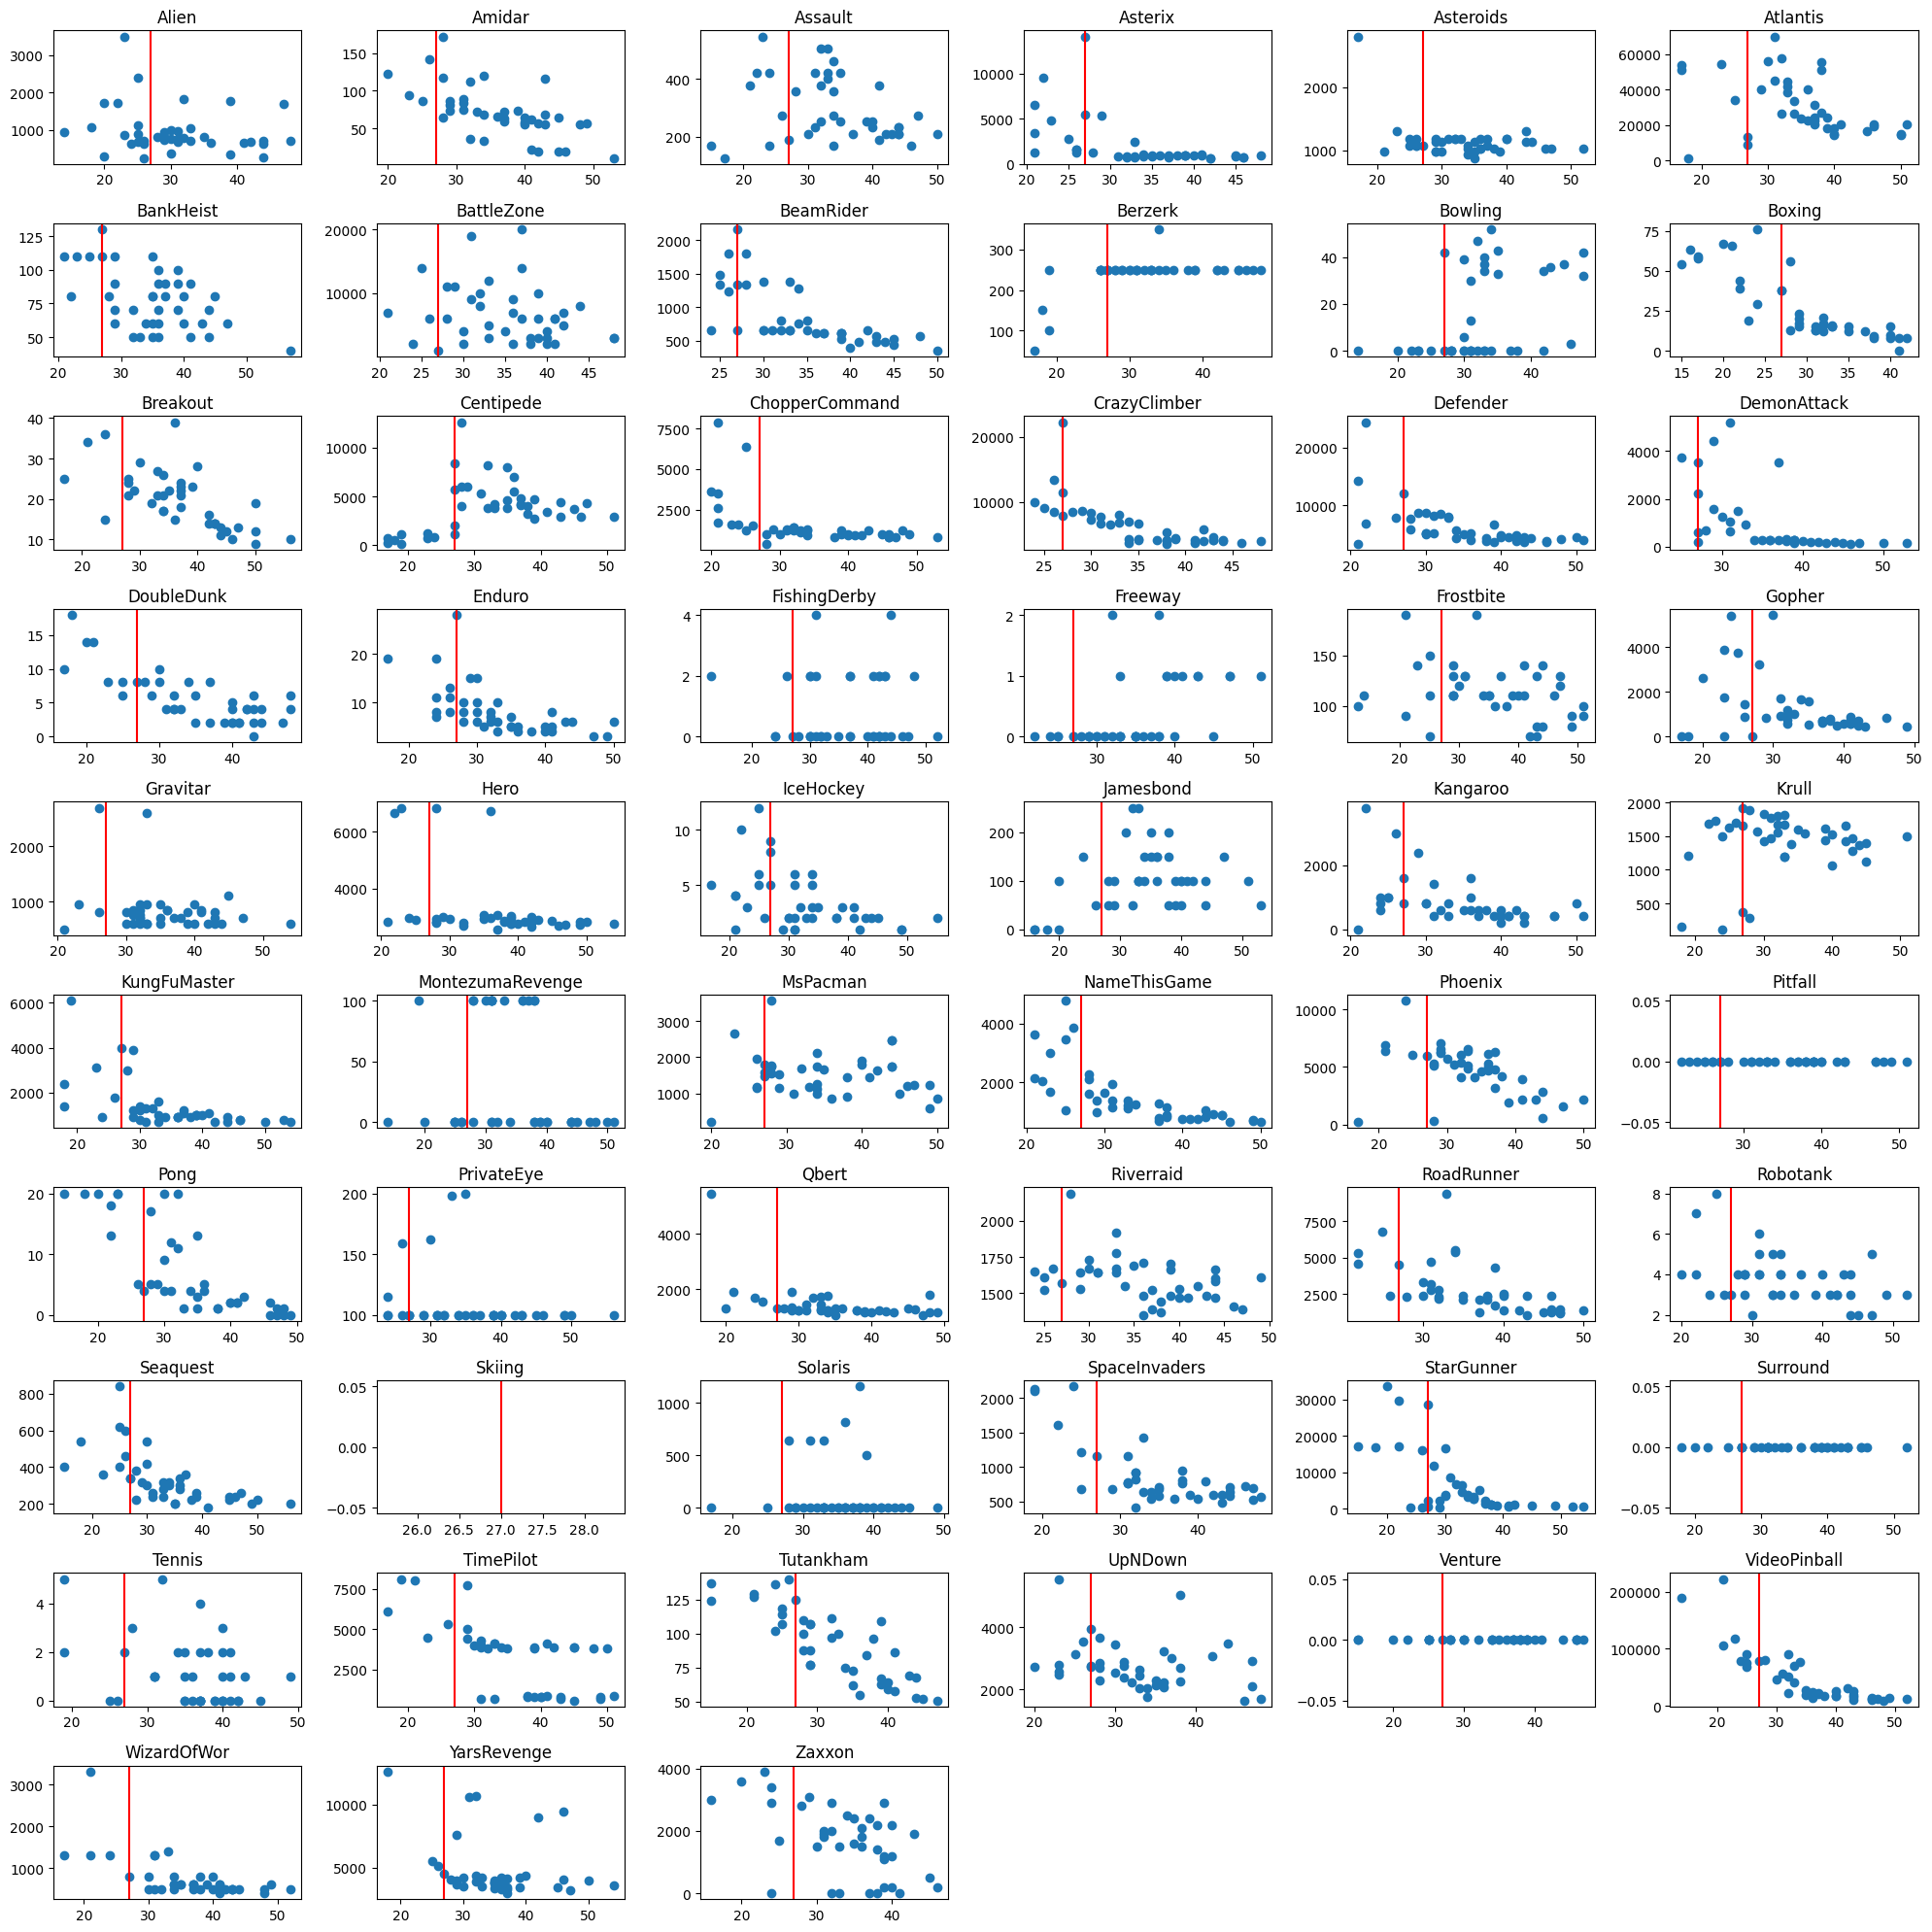

In [80]:
plt.figure(figsize=(20, 20))
for i, env_id in enumerate(tqdm(env_ids)):
    a = env_id2archives[env_id]
    sizes = np.array([len(i['trajs']) for i in a])
    hs = [i['config']['h'] for i in a]
    ws = [i['config']['w'] for i in a]
    ds = [i['config']['d'] for i in a]
    configs = np.array([hs, ws, ds]).T
    idx = np.argsort(np.abs(sizes-15000))[:5]
    scores = np.array([max(i['rets']) for i in a])
    
    plt.subplot(10, 6, i+1)
    plt.scatter(configs.sum(axis=-1), scores)
    plt.axvline(8+11+8, c='red')
    plt.title(env_id)
plt.tight_layout()
plt.show()

In [126]:
env_id2archives = {}
for env_id in tqdm(env_ids):
    env_id2archives[env_id] = [np.load(f, allow_pickle=True).item() for f in sorted(glob.glob(f'./data/goexplore/{env_id}*'))[:10]]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

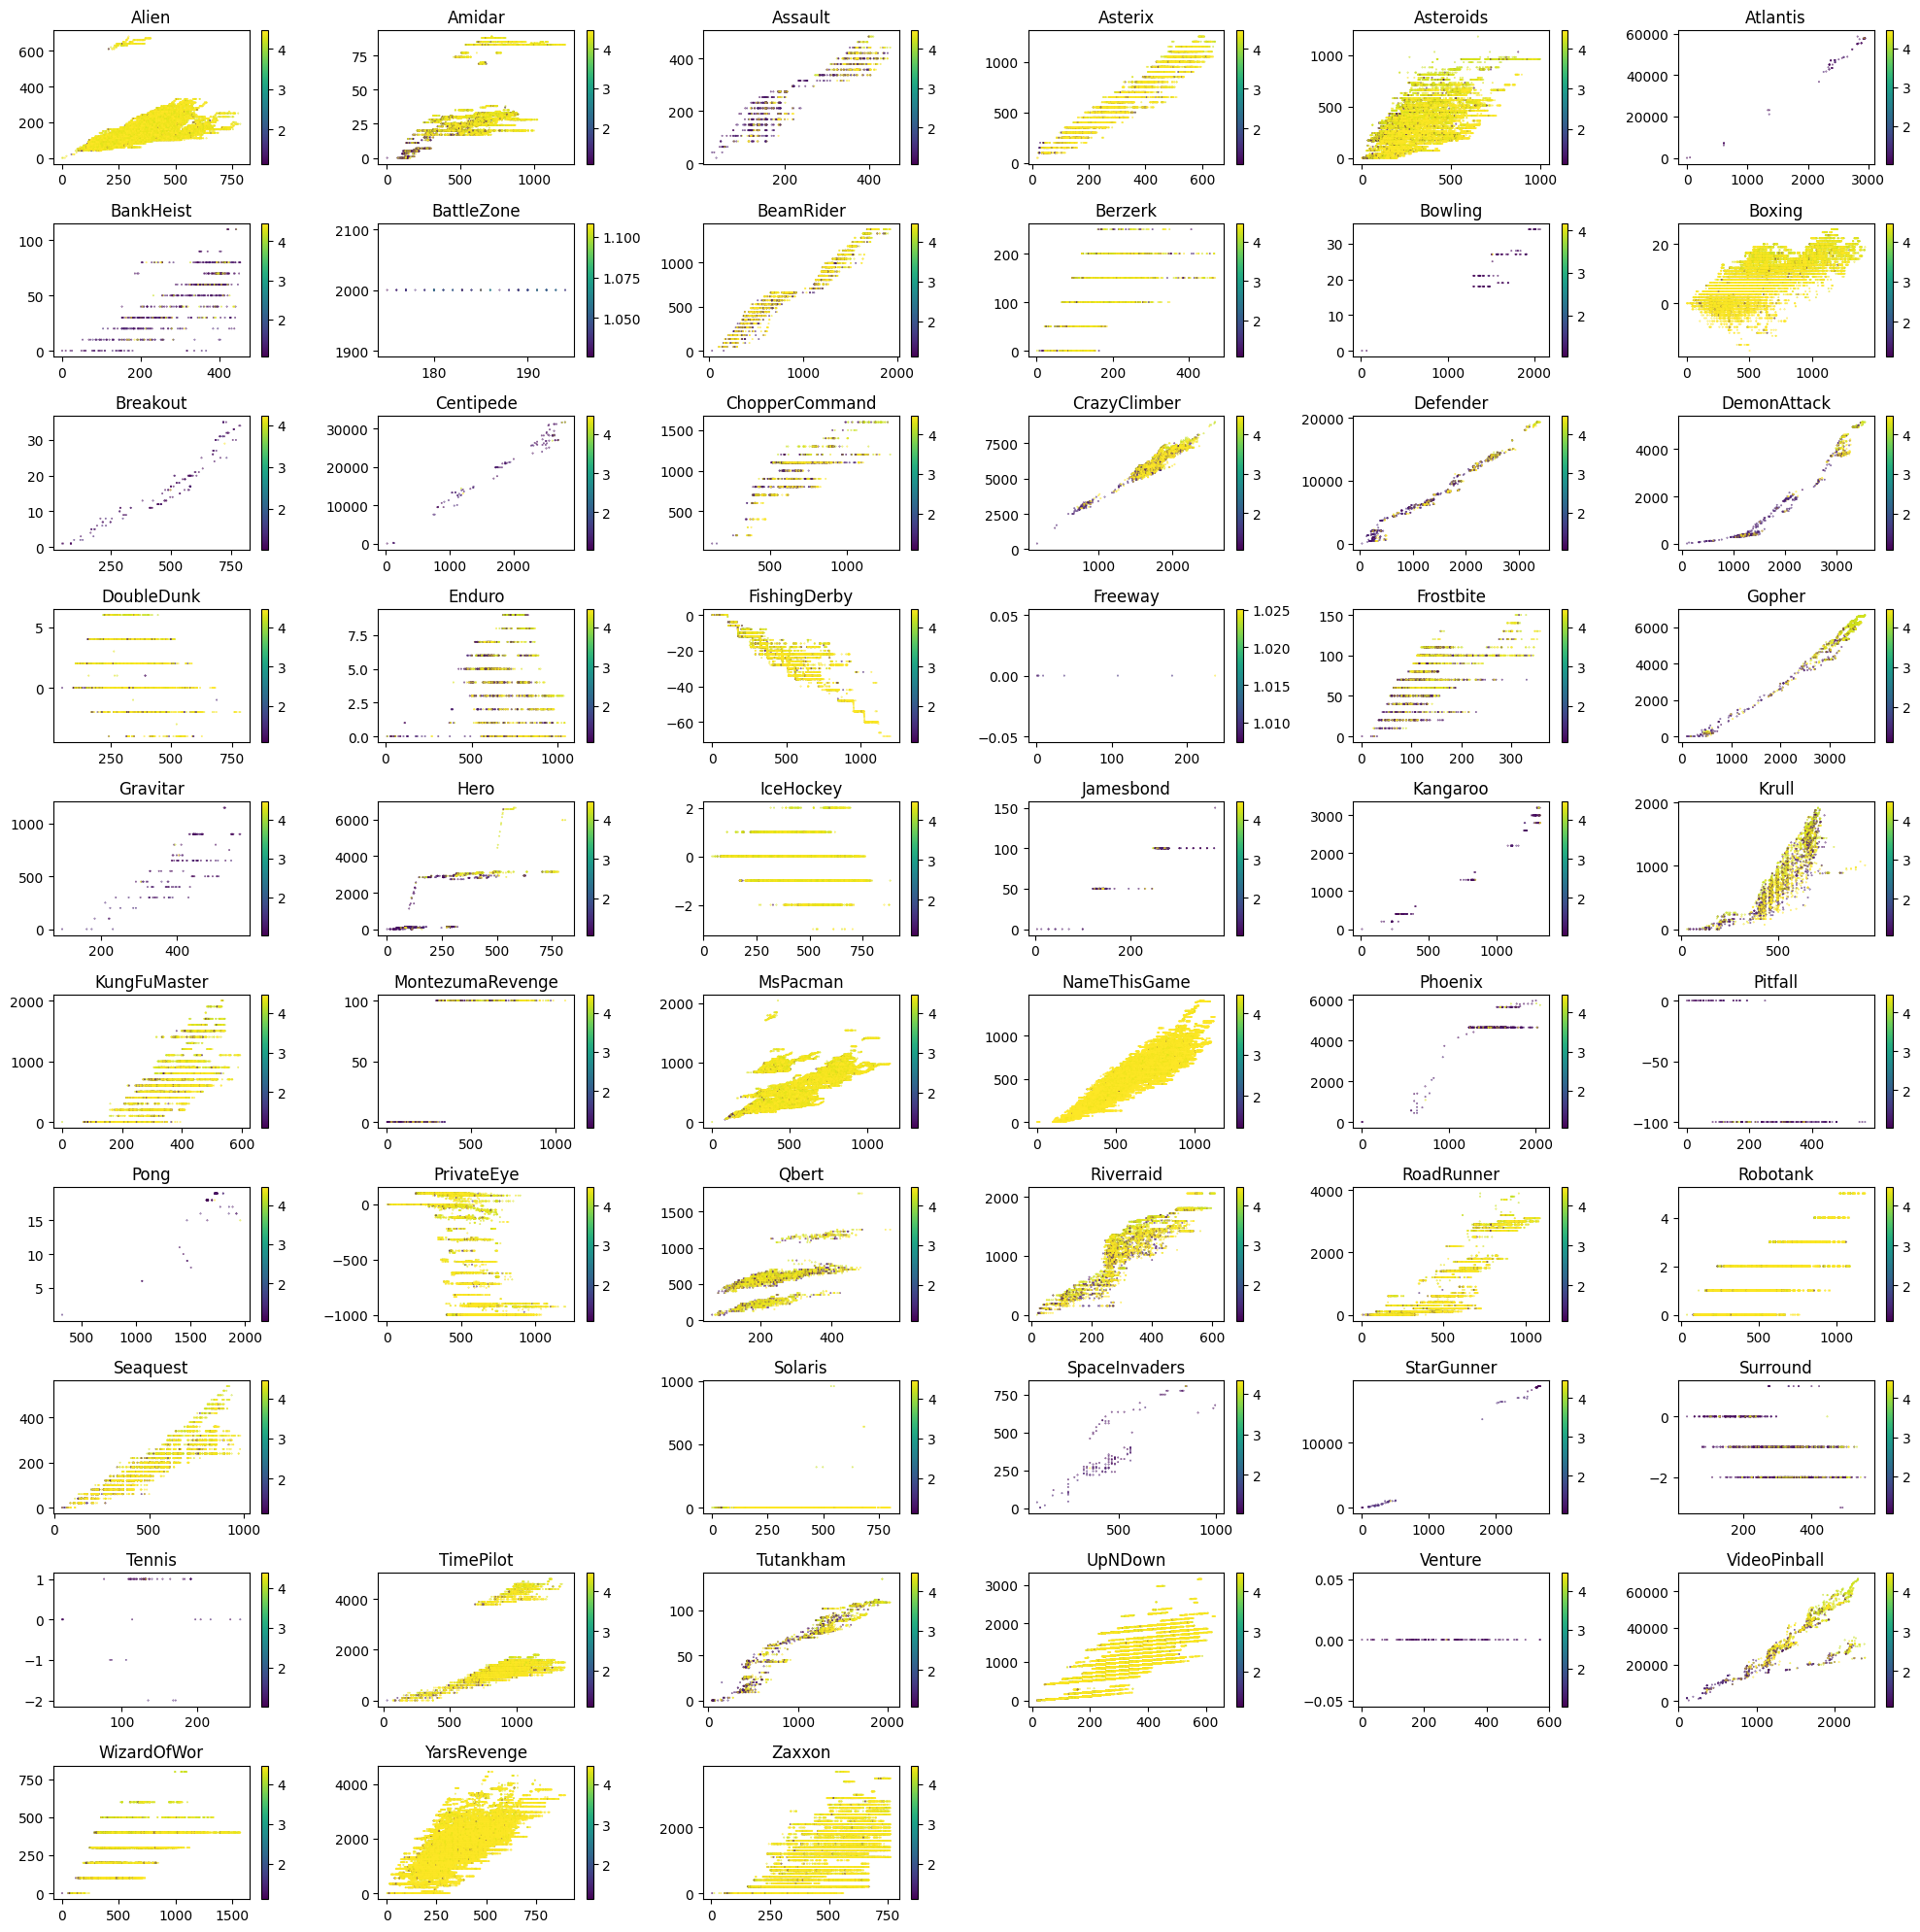

In [130]:
plt.figure(figsize=(20, 20))
for i, env_id in enumerate(tqdm(env_ids)):
    if env_id=='Skiing':
        continue
    a = env_id2archives[env_id]
    tlens = np.array([len(i) for i in a[0]['trajs']])
    scores = a[0]['scores']
    rets = a[0]['rets']
    
    plt.subplot(10, 6, i+1)
    plt.scatter(tlens, rets, s=.1, c=scores)
    plt.colorbar()
    plt.title(env_id)
plt.tight_layout()
plt.show()

  0%|          | 0/57 [00:00<?, ?it/s]

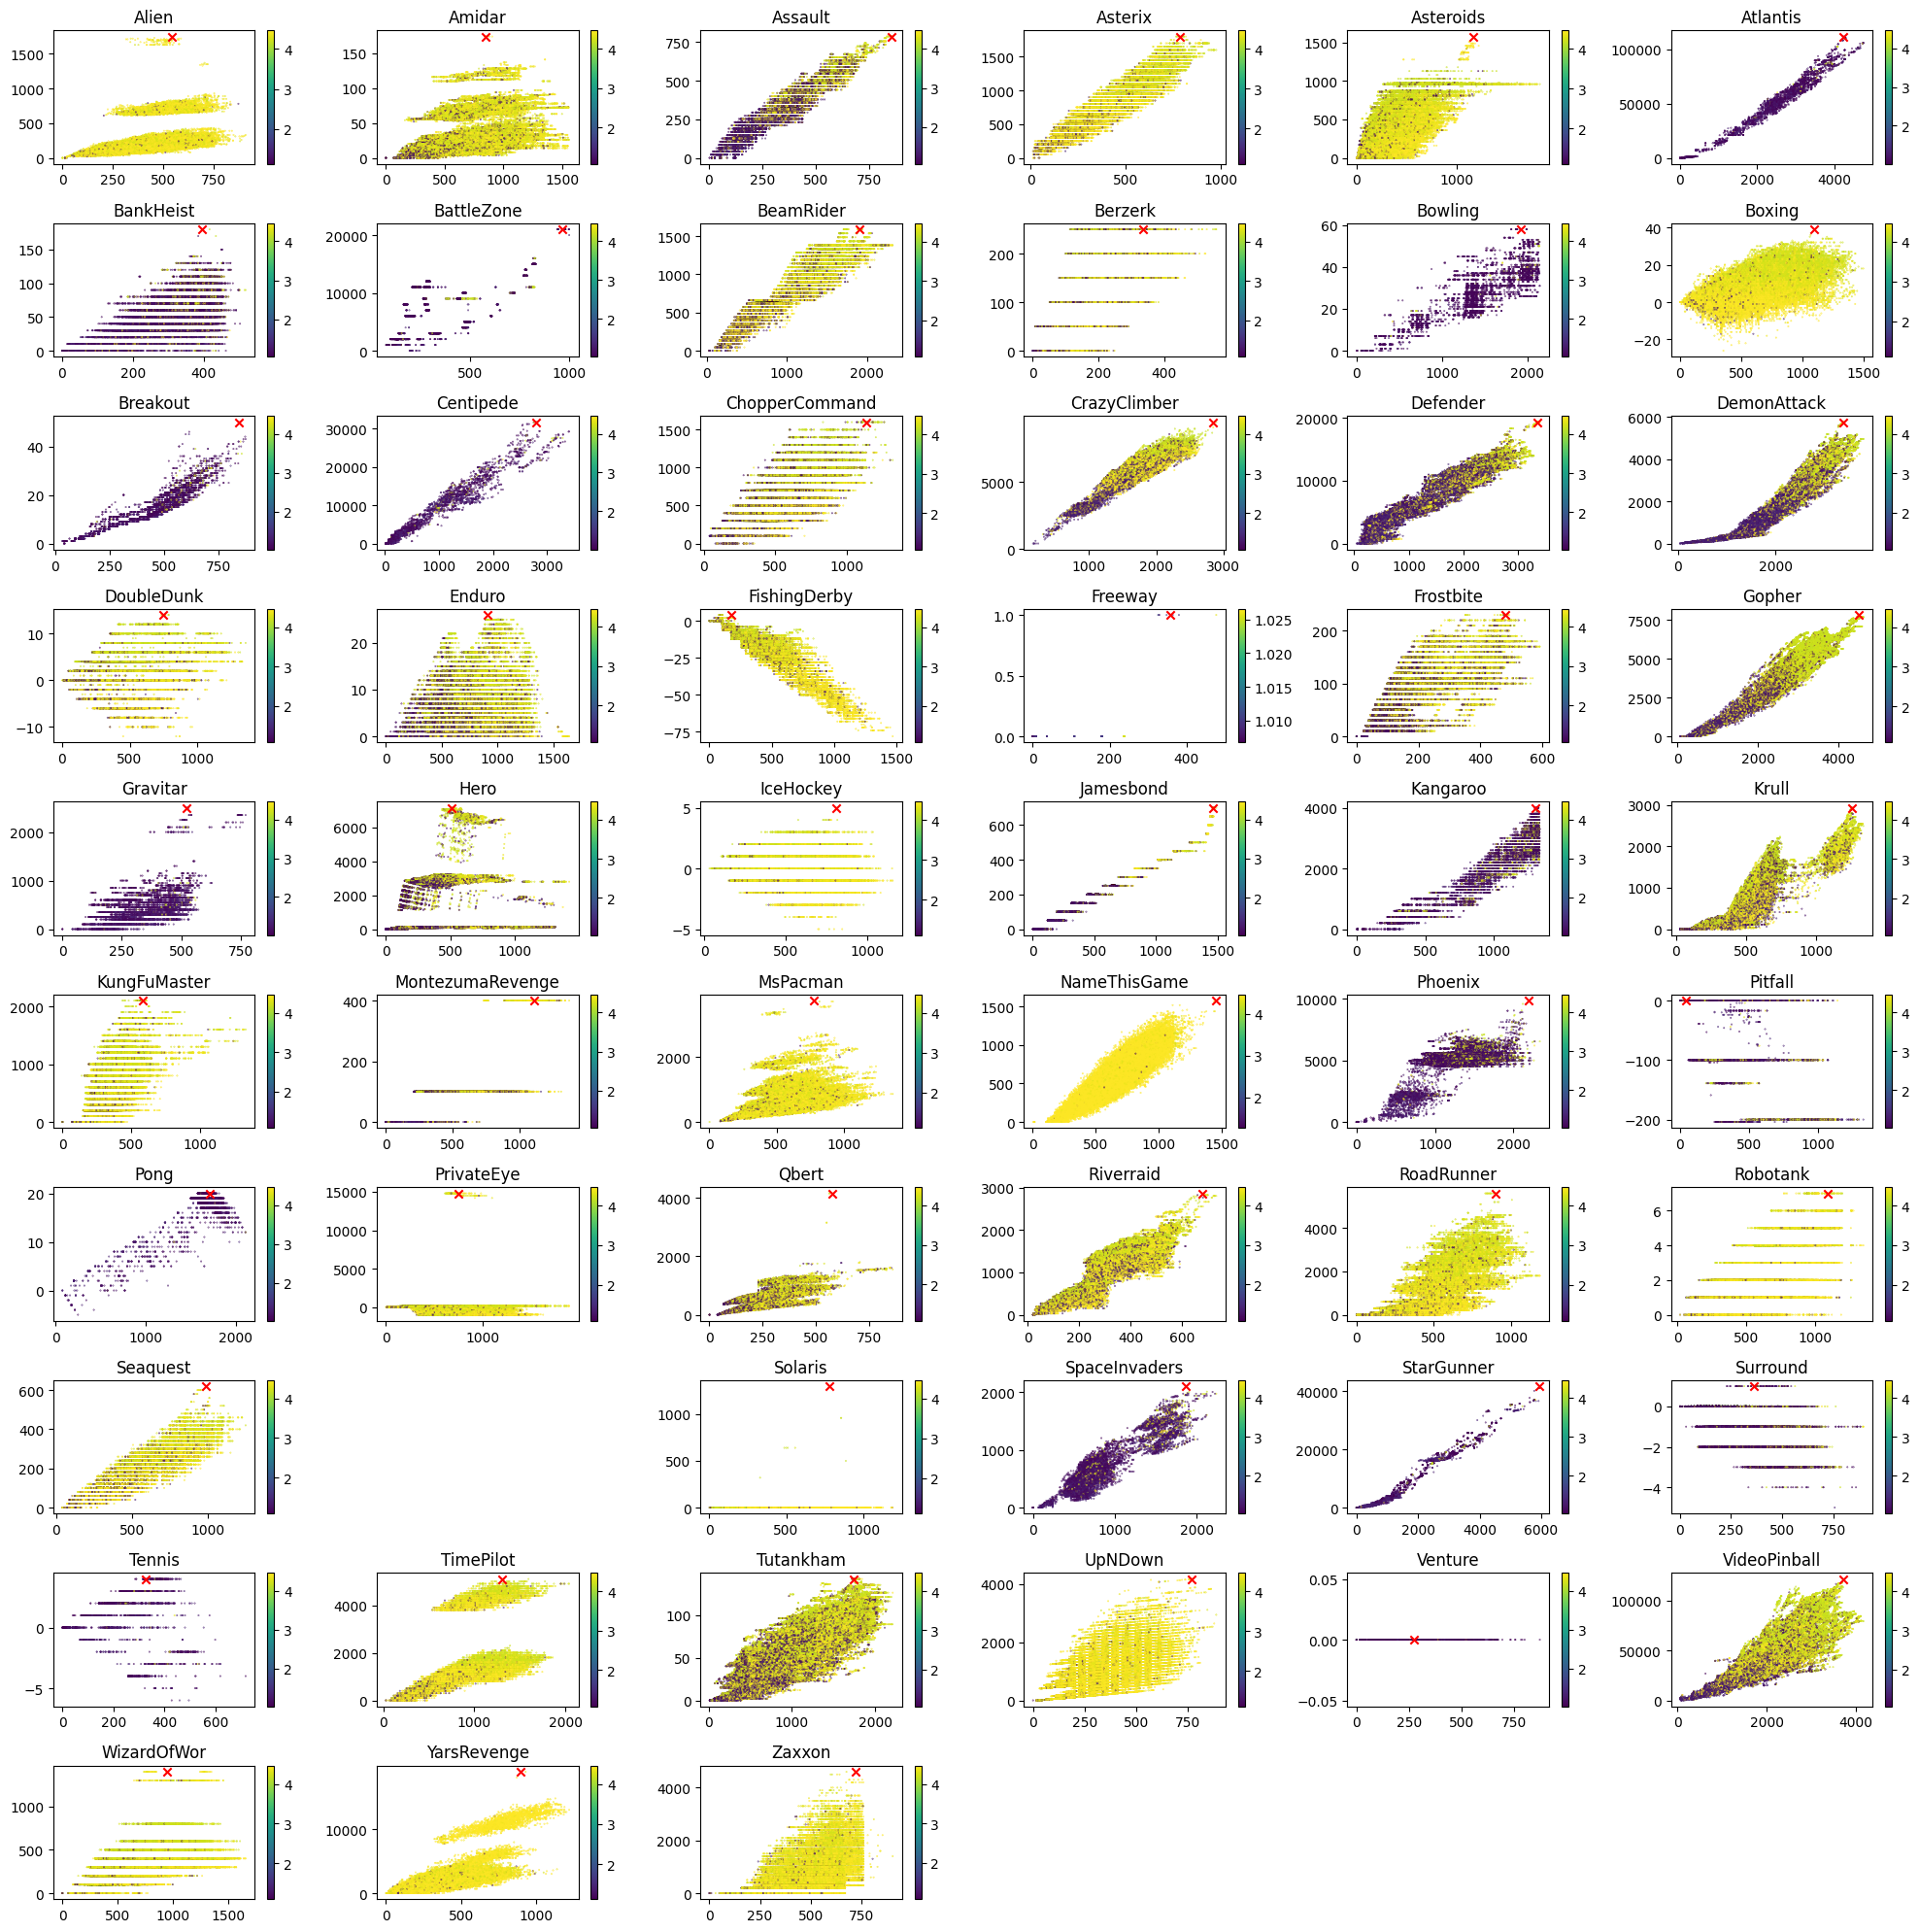

In [164]:
plt.figure(figsize=(20, 20))
for i, env_id in enumerate(tqdm(env_ids)):
    if env_id=='Skiing':
        continue
    archives = env_id2archives[env_id]
    tlens_all, rets_all, scores_all = [], [], []
    for archive in archives:
        trajs, rets, scores = archive['trajs'], archive['rets'], archive['scores']
        idx = np.random.permutation(len(trajs))[:100000//50]
        trajs, rets, scores = trajs[idx], rets[idx], scores[idx]
        tlens_all.extend([len(traj) for traj in trajs])
        rets_all.extend(rets)
        scores_all.extend(scores)

    plt.subplot(10, 6, i+1)
    plt.scatter(tlens_all, rets_all, s=.1, c=scores_all)
    plt.colorbar()
    plt.scatter(tlens_all[np.argmax(rets_all)], rets_all[np.argmax(rets_all)], marker='x', c='r')
    plt.title(env_id)
plt.tight_layout()
plt.show()

In [218]:
class GEBuffer(Buffer):
    def __init__(self, env, n_steps, sample_traj_fn, device=None):
        super().__init__(env, n_steps, device=device)
        self.trajs = [None for _ in range(self.env.num_envs)]
        self.traj_lens = np.zeros(self.env.num_envs, dtype=int)
        self.i_locs = np.zeros(self.env.num_envs, dtype=int)
        self.sample_traj_fn = sample_traj_fn

        self.buf_obs = np.zeros((env.num_envs, n_steps, 84, 84), dtype=np.uint8)
        self.buf_act = np.zeros((env.num_envs, n_steps), dtype=np.uint8)
        self.next_obs = np.zeros_like(env.observation_space.sample())
        env.envs[0].reset(seed=0)
        self.ram_start = env.envs[0].ale.getRAM().copy()

    def traj_over_subenv(self, id):
        self.trajs[id] = self.sample_traj_fn()
        self.traj_lens[id] = len(self.trajs[id])
        self.i_locs[id] = 0
        obs, _ = self.env.envs[id].reset(seed=0)
        assert np.array_equal(self.env.envs[id].ale.getRAM(), self.ram_start), "env reset to seed=0"
        return obs

    def gecollect(self, pbar=None):
        if self.first_collect:
            self.first_collect = False
            # obs, info = self.env.reset()
            # self.next_obs = info["obs"]
            # self.sample_new_traj(np.arange(self.env.num_envs))
            for id in range(env.num_envs):
                self.next_obs[id] = self.traj_over_subenv(id)
        
        for t in tqdm(range(self.n_steps)):
            self.buf_obs[:, t] = self.next_obs
            action = np.array([traj[i_loc] for traj, i_loc in zip(self.trajs, self.i_locs)])
            self.i_locs += 1
            self.buf_act[:, t] = action
            self.next_obs, _, term, trunc, _ = self.env.step(action)
            assert not any(term) and not any(trunc), "found a done in the ge buffer"
            # self.dones[:, t] = info["done"]
            # self.next_obs = info["obs"]
            for id in np.where(self.i_locs >= self.traj_lens)[0]:
                self.next_obs[id] = self.traj_over_subenv(id)
        self.obss[:, :] = torch.from_numpy(self.buf_obs).to(self.device)
        self.acts[:, :] = torch.from_numpy(self.buf_act).to(self.device)
            
def make_ge_env_single(env_id):
    env = gym.make(f"ALE/{env_id}-v5", frameskip=1, repeat_action_probability=0.0, full_action_space=True)
    env = gym.wrappers.AtariPreprocessing(env, noop_max=1, frame_skip=4, screen_size=84, grayscale_obs=True)
    return env
def make_ge_env(env_id, n_envs):
    make_fn = partial(make_ge_env_single, env_id=env_id)
    return gym.vector.SyncVectorEnv([make_fn for _ in range(n_envs)])

In [219]:
env_id = 'CrazyClimber'

In [220]:
archives = env_id2archives[env_id]

In [221]:
archive = archives[0]
trajs, rets = archive['trajs'], archive['rets']
traj_best, ret_best = trajs[np.argmax(rets)], rets[np.argmax(rets)]
print(ret_best)

9000.0


In [222]:
len(traj_best)

2570

In [283]:
env_id = 'CrazyClimber'
env = make_ge_env(env_id, 8)
buf = GEBuffer(env, 512, sample_traj_fn=lambda : traj_best, device=device)
buf.gecollect()

  0%|          | 0/512 [00:00<?, ?it/s]

In [284]:
import utils
device = 'cuda'

In [285]:
agent = utils.create_agent('gpt', 18, 64, device=device)
opt = agent.create_optimizer(lr=2.5e-4)

num decayed parameter tensors: 24, with 4,041,728 parameters
num non-decayed parameter tensors: 41, with 14,515 parameters
using fused AdamW: False


In [286]:
for i in tqdm(range(1000)):
    batch = buf.generate_batch(8*128, 64)
    obs, act = batch['obs'], batch['act']
    obs, act = obs[::8], act[::8]
    obs = obs[:, :, None, :, :]
    logits, values = agent(None, obs, act, None)

    loss_bc = torch.nn.functional.cross_entropy(rearrange(logits, "b t d -> (b t) d"), rearrange(act, "b t -> (b t)"), reduction="none")
    loss_bc = rearrange(loss_bc, "(b t) -> b t", b=128)
    loss = loss_bc.mean()

    opt.zero_grad()
    loss.backward()
    opt.step()
    if i%50==0:
        print(np.e**loss.item())

  0%|          | 0/1000 [00:00<?, ?it/s]

18.24720586096096
14.413251706081033
5.279708096638742
2.040170976885424
1.2128287417799601
1.213245656939302
1.0752583022298672
1.0661791193403138
1.4030796466140678
1.0467526134705416
1.059752924563945


KeyboardInterrupt: 

In [392]:
import copy
def filter_out_subtrajs(trajs):
    trajs = trajs.copy()
    tlens = np.array([len(i) for i in trajs])
    idx = np.argsort(tlens)
    trajs, tlens = trajs[idx], tlens[idx]
    newtrajs = []

    for i in tqdm(range(len(trajs))):
        is_sub = False
        for j in range(i+1, len(trajs)):
            ti, tj = trajs[i], trajs[j]
            if np.array_equal(ti, tj[:len(ti)]):
                is_sub = True
                break
        if not is_sub:
            newtrajs.append(trajs[i])
    newtrajs = np.array(newtrajs, dtype=object)
    return newtrajs

In [348]:
# for env_id in env_ids:
#     archives = env_id2archives[env_id]
#     archive = archives[0]
#     newtrajs = filter_out_subtrajs(archive)
    
#     a = len(newtrajs)
#     b = len(archive['trajs'])
#     print(env_id)
#     print(f'{a}/{b} = {a/b: 10.4f}')

  0%|          | 0/47536 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [442]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.id = None
    def __repr__(self):
        return repr(self.children)

def insert(root, word, id):
    node = root
    for char in word:
        if char not in node.children:
            node.children[char] = TrieNode()
        node = node.children[char]
    node.id = id

def filter_substrings(strings):
    root = TrieNode()
    for id, string in enumerate(strings):
        insert(root, string, id)
    ids = []
    nodes_to_visit = [root]
    while len(nodes_to_visit)>0:
        node = nodes_to_visit.pop(0)
        nodes_to_visit.extend(node.children.values())
        if len(node.children)==0:
            assert node.id is not None
            ids.append(node.id)
    return np.array(ids)

# Example usage

# input_strings = ["apple", "app", "orange", "le", "banana", "ban"]
# filtered_strings = filter_substrings(input_strings)
# print(filtered_strings)  # Output: ['apple', 'orange', 'banana']


In [447]:
archives = env_id2archives['Alien']
archive = archives[0]
trajs = archive['trajs']
len(trajs)

47536

In [411]:
newtrajs = filter_out_subtrajs(trajs)
len(newtrajs)

  0%|          | 0/47536 [00:00<?, ?it/s]

1824

In [448]:
ids = filter_substrings(trajs)
newtrajs = trajs[ids]

In [450]:
for env_id in env_ids:
    if env_id=='Skiing':
        continue
    archives = env_id2archives[env_id]
    archive = archives[0]
    trajs = archive['trajs']
    ids = filter_substrings(trajs)
    newtrajs = trajs[ids]
    a = len(newtrajs)
    b = len(trajs)
    print(env_id)
    print(f'{a}/{b} = {a/b: 10.4f}')

Alien
1824/47536 =     0.0384
Amidar
928/7947 =     0.1168
Assault
461/1647 =     0.2799
Asterix
1359/9422 =     0.1442
Asteroids
1296/20306 =     0.0638
Atlantis
36/70 =     0.5143
BankHeist
318/705 =     0.4511
BattleZone
43/84 =     0.5119
BeamRider
978/3819 =     0.2561
Berzerk
1000/5020 =     0.1992
Bowling
33/109 =     0.3028
Boxing
1846/30784 =     0.0600
Breakout
65/142 =     0.4577
Centipede
59/106 =     0.5566
ChopperCommand
704/2304 =     0.3056
CrazyClimber
893/3362 =     0.2656
Defender
411/1134 =     0.3624
DemonAttack
450/894 =     0.5034
DoubleDunk
1174/6056 =     0.1939
Enduro
714/2175 =     0.3283
FishingDerby
1612/12338 =     0.1307
Freeway
1/8 =     0.1250
Frostbite
651/2689 =     0.2421
Gopher
384/1167 =     0.3290
Gravitar
84/152 =     0.5526
Hero
333/970 =     0.3433
IceHockey
1785/28544 =     0.0625
Jamesbond
265/550 =     0.4818
Kangaroo
107/203 =     0.5271
Krull
736/2701 =     0.2725
KungFuMaster
1228/8436 =     0.1456
MontezumaRevenge
437/1216 =     0.3594
M

In [482]:
env = gym.make(f"ALE/{'Freeway'}-v5", frameskip=1, repeat_action_probability=0.0, full_action_space=True)
env = gym.wrappers.AtariPreprocessing(env, noop_max=1, frame_skip=4, screen_size=84, grayscale_obs=False)

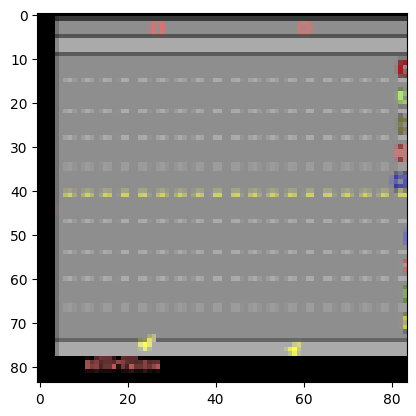

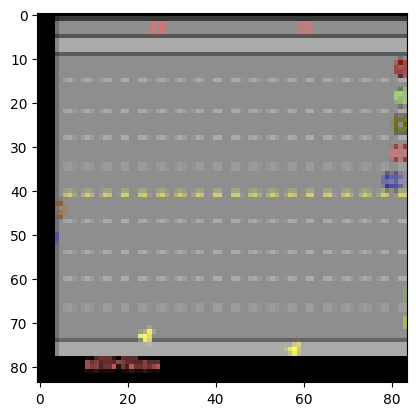

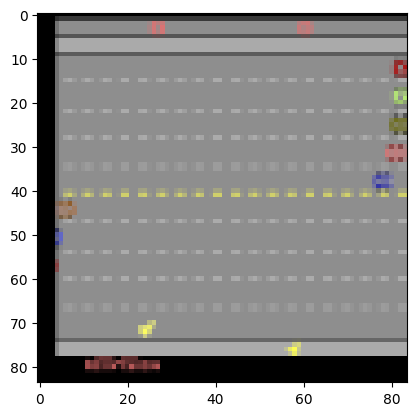

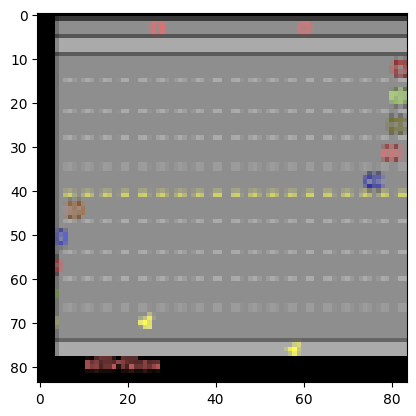

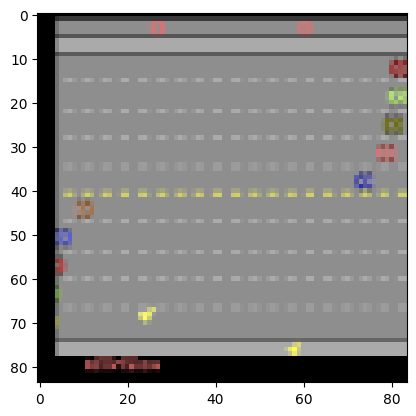

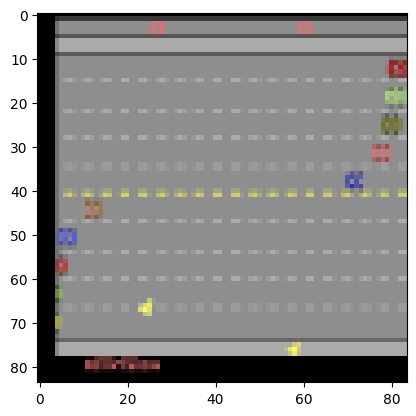

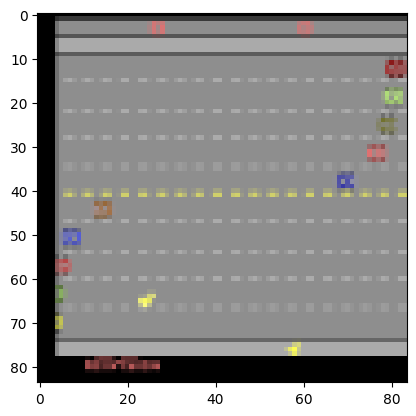

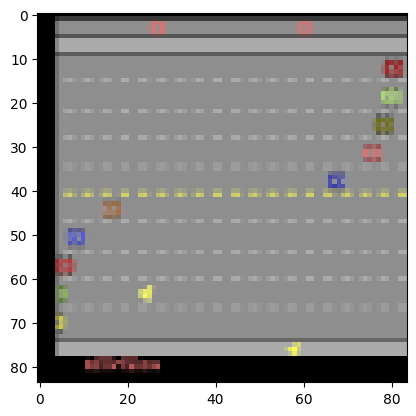

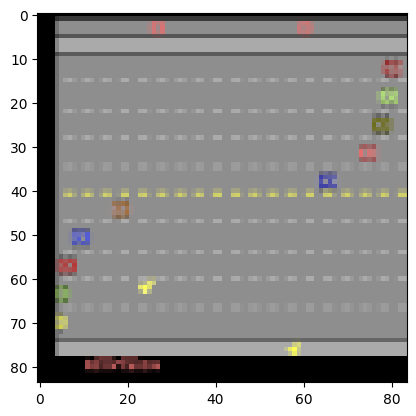

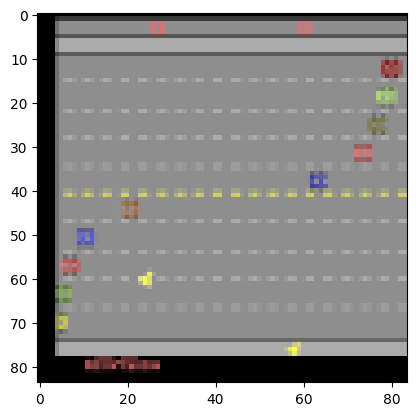

In [483]:
env.reset()
for i in range(10):
    obs, _, _, _, _ = env.step(2)
    plt.imshow(obs)
    plt.show()

In [9]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.id = None
    def __repr__(self):
        return repr(self.children)

def insert(root, word, id):
    node = root
    for char in word:
        if char not in node.children:
            node.children[char] = TrieNode()
        node = node.children[char]
    node.id = id

def filter_substrings(strings):
    root = TrieNode()
    for id, string in enumerate(strings):
        insert(root, string, id)
    ids = []
    nodes_to_visit = [root]
    while len(nodes_to_visit)>0:
        node = nodes_to_visit.pop(0)
        nodes_to_visit.extend(node.children.values())
        if len(node.children)==0:
            assert node.id is not None
            ids.append(node.id)
    return np.array(ids)

In [6]:
env_id2archives = {}
for env_id in tqdm(env_ids):
    env_id2archives[env_id] = [np.load(f, allow_pickle=True).item() for f in sorted(glob.glob(f'./data/goexplore/{env_id}*'))[:10]]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

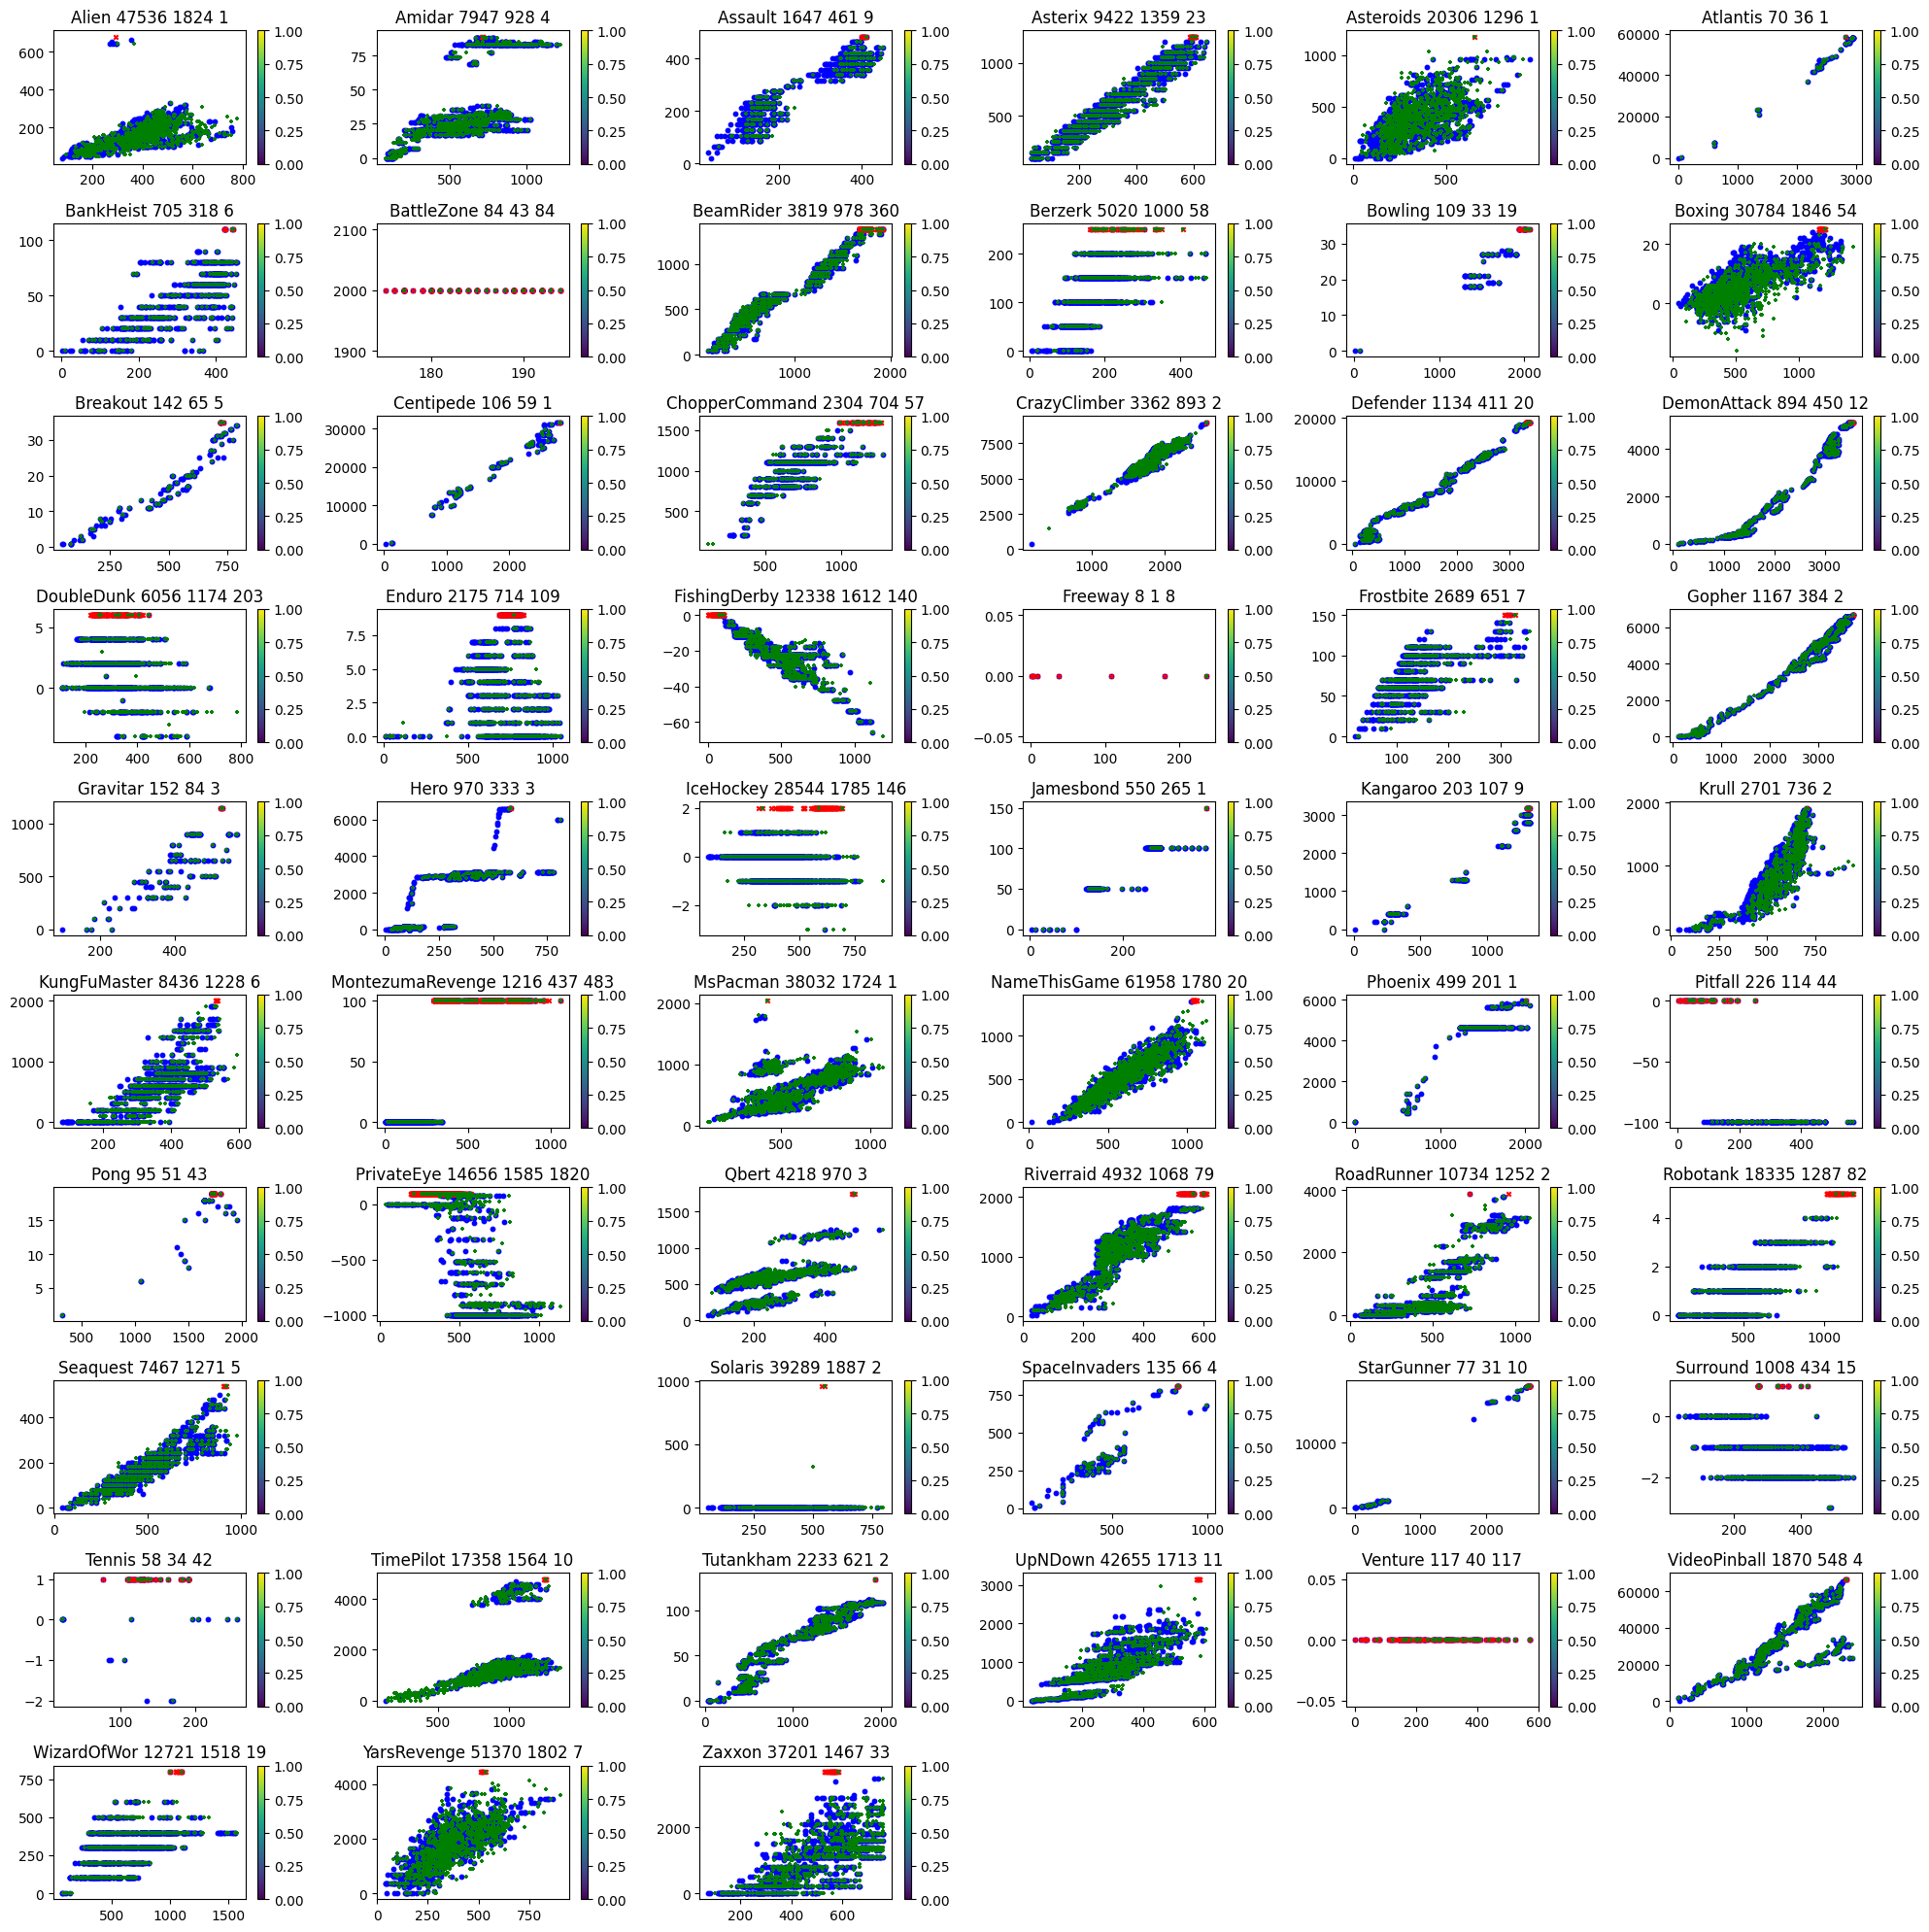

In [28]:
plt.figure(figsize=(20, 20))
for i, env_id in enumerate(tqdm(env_ids[:])):
    if env_id=='Skiing':
        continue
    archives = env_id2archives[env_id]
    tlens_all, rets_all, scores_all = [], [], []
    tlens_best, rets_best = [], []
    tlens_leaf, rets_leaf = [], []
    for archive in archives[:1]:
        trajs, rets, scores = archive['trajs'], archive['rets'], archive['scores']
        idx_all = np.arange(len(trajs))
        idx_best = np.nonzero(rets==np.max(rets))[0]
        idx_leaf = filter_substrings(trajs)
        
        ii = np.random.permutation(len(idx_all))[:10000//len(archives)]
        tlens_all.extend([len(traj) for traj in trajs[idx_all[ii]]])
        rets_all.extend(rets[idx_all[ii]])
        scores_all.extend(scores[idx_all[ii]])
        
        ii = np.random.permutation(len(idx_best))[:10000//len(archives)]
        tlens_best.extend([len(traj) for traj in trajs[idx_best[ii]]])
        rets_best.extend(rets[idx_best[ii]])

        ii = np.random.permutation(len(idx_leaf))[:10000//len(archives)]
        tlens_leaf.extend([len(traj) for traj in trajs[idx_leaf[ii]]])
        rets_leaf.extend(rets[idx_leaf[ii]])
        
    plt.subplot(10, 6, i+1)
    # plt.scatter(tlens_all, rets_all, s=.1, c=scores_all)
    plt.scatter(tlens_all, rets_all, s=10, c='b')
    plt.colorbar()
    plt.scatter(tlens_best, rets_best, s=10, marker='x', c='r')
    plt.scatter(tlens_leaf, rets_leaf, s=10, marker='+', c='g')
    # plt.scatter(tlens_best, rets_best, s=80, facecolors='none', edgecolors='r')
    # plt.scatter(tlens_leaf, rets_leaf, s=80, facecolors='none', edgecolors='g')
    plt.title(f'{env_id} {len(idx_all)} {len(idx_leaf)} {len(idx_best)}')
plt.tight_layout()
plt.show()

In [129]:
env_id = 'DemonAttack'

In [130]:
archive = env_id2archives[env_id][0]
trajs, rets = archive['trajs'], archive['rets']
traj = trajs[rets==rets.max()][0]

In [131]:
env = envpool.make_gymnasium(f'{env_id}-v5', img_height=210, img_width=210, gray_scale=False, stack_num=1, frame_skip=4, repeat_action_probability=0.0, noop_max=1, use_fire_reset=False, full_action_space=True)
rand = copy.deepcopy(env.np_random)

In [132]:
for _ in tqdm(range(100)):
    env.np_random = copy.deepcopy(rand)
    env._np_random = copy.deepcopy(rand)
    env.reset()
    for i, a in enumerate(traj):
        _, _, term, trunc, _ = env.step(np.array([a]))
        assert not term.any() and not trunc.any()

  0%|          | 0/100 [00:00<?, ?it/s]

AssertionError: 

In [139]:
dir(env)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_action_keys',
 '_action_names',
 '_all_env_ids',
 '_check_action',
 '_check_action_finished',
 '_from',
 '_is_protocol',
 '_last_action_name',
 '_last_action_type',
 '_np_random',
 '_recv',
 '_reset',
 '_send',
 '_spec',
 '_state_keys',
 '_to',
 '_xla',
 'action_space',
 'all_env_ids',
 'async_reset',
 'close',
 'config',
 'is_async',
 'metadata',
 'np_random',
 'observation_space',
 'recv',
 'render',
 'render_mode',
 'reset',
 'reward_range',
 'seed'

In [162]:
parser = argparse.ArgumentParser()
parser.add_argument("--obj", type=str, default='ext')
parser.add_argument("--n_steps", type=int, default=1000)

_StoreAction(option_strings=['--n_steps'], dest='n_steps', nargs=None, const=None, default=1000, type=<class 'int'>, choices=None, required=False, help=None, metavar=None)

In [164]:
args, uargs = parser.parse_known_args('--obj=hello --n_steps=10 --a=8 --preobj=32'.split())

In [166]:
uargs

['--a=8', '--preobj=32']

In [174]:
dict([tuple(uarg.replace('--', '').split('=')) for uarg in uargs])

{'a': '8', 'preobj': '32'}